In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import math



from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
data = pd.read_csv('Denver.csv',header = None)

In [3]:
y = data.ix[1:len(data),4].values 
X = data.iloc[1:len(data), [1,12,13,14,15,16,17,20]].values

In [4]:
model = ExtraTreesClassifier()
model.fit(X, y)
# display the relative importance of each attribute
print(model.feature_importances_)

[ 0.16546736  0.11839017  0.13418806  0.1478561   0.10161419  0.08072872
  0.13110494  0.12065045]


In [5]:
X = data.iloc[1:len(data), [1,12,13,14,15,17,20]].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_dev, y_train, y_dev = train_test_split(X_train,y_train,test_size=0.18, random_state=42)
print(len(X_train),len(X_test),len(X_dev))

254 55 56


In [7]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

expected = y_dev
predicted = model.predict(X_dev)

print("accuracy: " , accuracy_score(expected, predicted))


expected = y_test
predicted = model.predict(X_test)

print("accuracy: " , accuracy_score(expected, predicted))

accuracy:  0.678571428571
accuracy:  0.654545454545


In [8]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

 
expected = y_dev
predicted = model.predict(X_dev)

print("accuracy: " , accuracy_score(expected, predicted))


expected = y_test
predicted = model.predict(X_test)

print("accuracy: " , accuracy_score(expected, predicted))

accuracy:  0.625
accuracy:  0.690909090909


In [9]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier


[0.7321428571428571, 12]


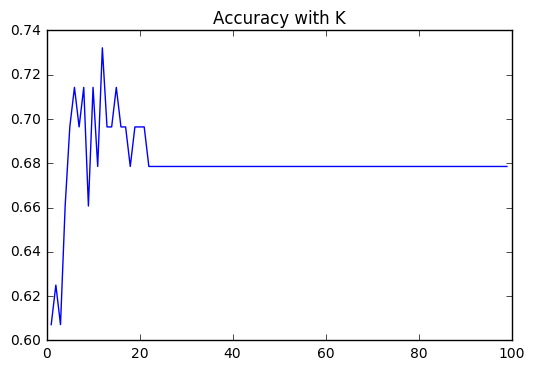

In [10]:
kResult= []
for n in range(1, 100,1):
    model = KNeighborsClassifier(n_neighbors = n)
    model.fit(X_train, y_train)

    expected = y_dev
    predicted = model.predict(X_dev)
    acc = accuracy_score(expected, predicted)


    kResult.append([acc,n])
print(max(kResult))
#plotting peak k value preformance 
kResult = pd.DataFrame(kResult, columns=["n", "acc"])
plt.plot(kResult.acc, kResult.n)
plt.title("Accuracy with K")
plt.show()

In [12]:
model = KNeighborsClassifier(n_neighbors = 12)
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)
print("accuracy: " , accuracy_score(expected, predicted))

7.416198487095663
accuracy:  0.732142857143
accuracy:  0.690909090909
